In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("titanic3.xls")

In [3]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [5]:
df.dtypes.value_counts()

object     7
int64      4
float64    3
dtype: int64

In [6]:
Max_Threshold =  df["age"].quantile(0.95) 
Max_Threshold

57.0

In [7]:
df[df["age"]>Max_Threshold].head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks"
33,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,8,NaN,"Birkdale, England Cleveland, Ohio"
42,1,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",female,59.0,2,0,11769,51.4792,C101,S,D,NaN,"Belmont, MA"


In [8]:
Min_Threshold =  df["age"].quantile(0.05) 
Min_Threshold

5.0

In [9]:
df[df["age"]< Min_Threshold].shape # to see the Outliers

(51, 14)

In [10]:
Max_Threshold, Min_Threshold = df.age.quantile([0.05 , 0.95])

In [11]:
Max_Threshold

5.0

In [12]:
Min_Threshold

57.0

In [13]:
# just to seee some samplesdf.sample(5)

In [14]:
df[df["age"]<0.05].shape # this line Code is not the same like above

(0, 14)

In [15]:
list_object = []
for col in df.select_dtypes("object"):
    list_object.append(col)
list_object

['name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest']

In [16]:
df.shape

(1309, 14)

In [17]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
embarked     0.001528
age          0.200917
home.dest    0.430863
boat         0.628724
cabin        0.774637
body         0.907563
dtype: float64

In [18]:
#df.fillna(0)

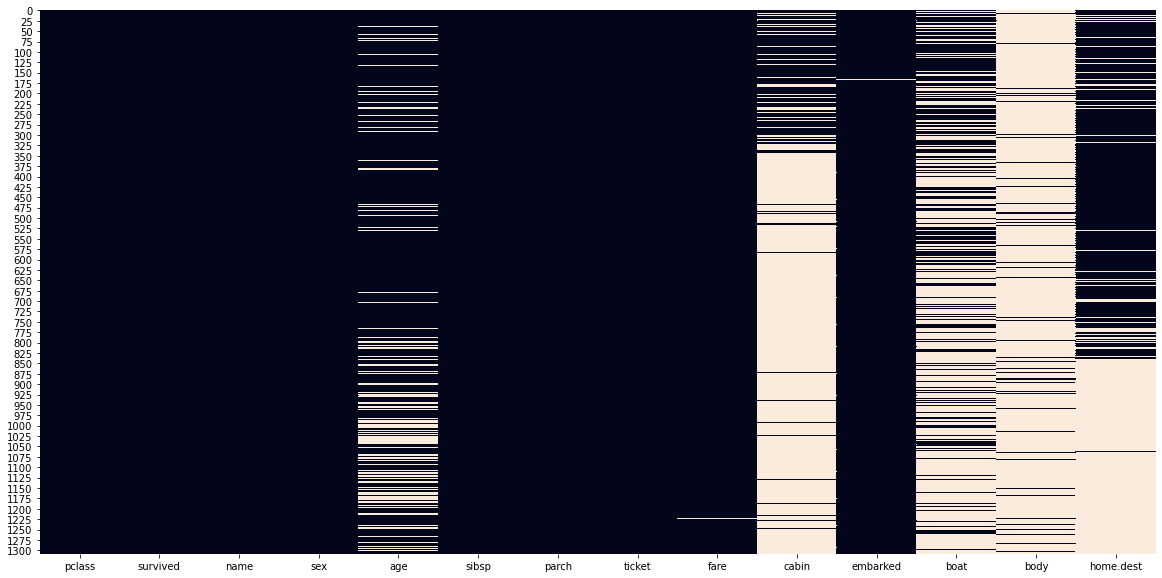

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

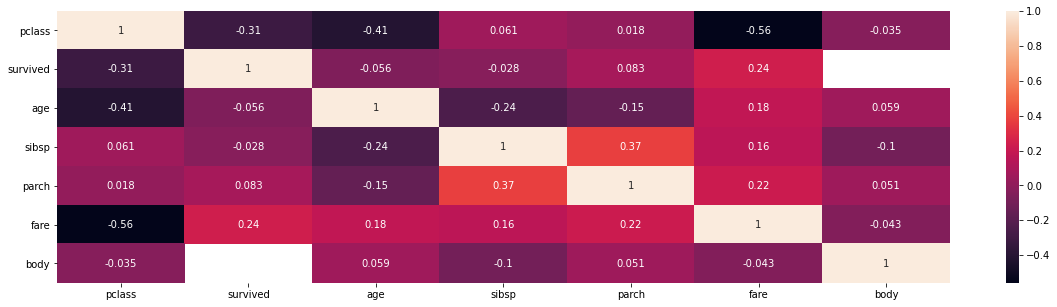

In [20]:
plt.figure(figsize=(20 , 5))
sns.heatmap(df.corr() , annot= True)

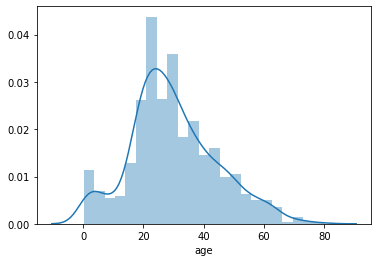

In [21]:
sns.distplot(df["age"])

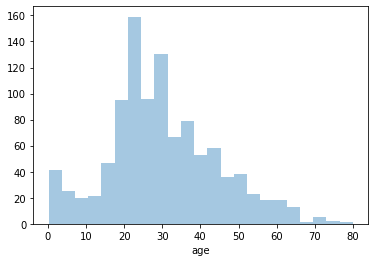

In [22]:
sns.distplot(df["age"] , kde = False)

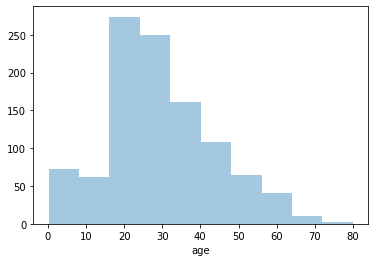

In [23]:
sns.distplot(df["age"] , kde = False , bins = 10)

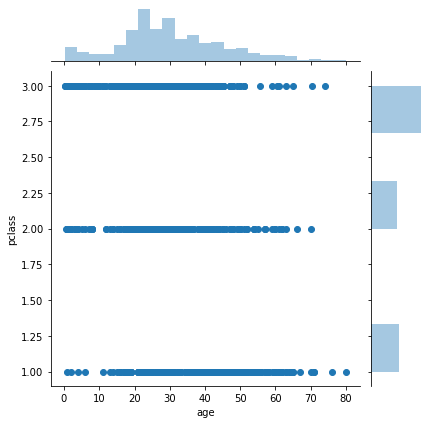

In [24]:
sns.jointplot(x = "age" , y = "pclass" , data = df)
# this representation is normal why P take only three values
# this plot work only with numerical data

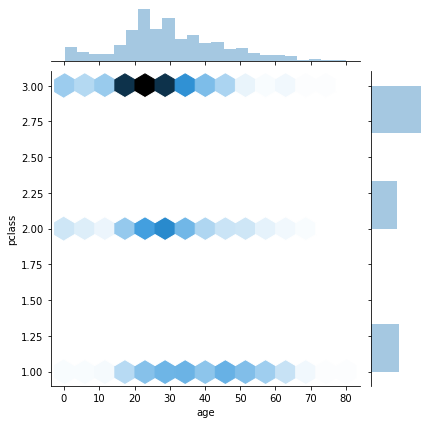

In [25]:
sns.jointplot(x = "age" , y = "pclass" , data = df , kind ="hex")
# this representation is normal why survived take only three values

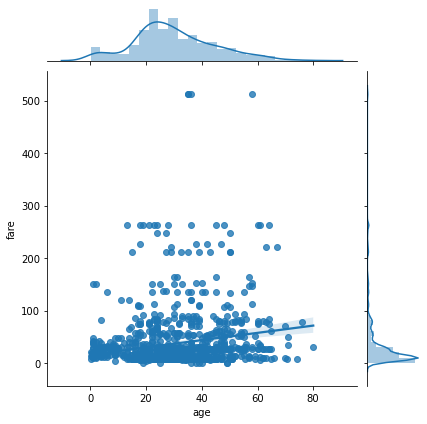

In [26]:
sns.jointplot(x = "age" , y = "fare" , data = df , kind ="reg")
# this representation is normal why survived take only three values

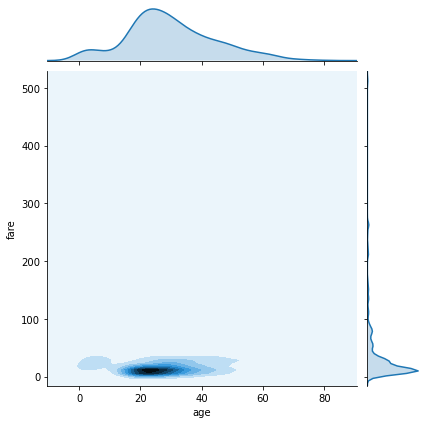

In [27]:
sns.jointplot(x = "age" , y = "fare" , data = df , kind ="kde")
# this representation is normal why survived take only three values

In [28]:
# sns.pairplot(df , hue = "sex" , palete = "coolwarm")
# the parameter hue hast to be a categorical column

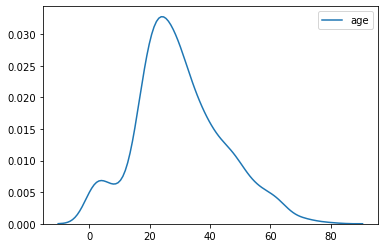

In [29]:
sns.kdeplot(df["age"])

In [30]:
# sns.clustermap(df.corr()) this code doesn not work because we have missing data in our dataset

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import IsolationForest

In [32]:
for col in df.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        df[col].fillna("None", inplace = True)
        le.fit(list(df[col].astype(str).values))
        df[col] = le.transform(list(df[col].astype(str).values))
    else:
        df[col].fillna(-999 , inplace = True)
# when we use Isolation forest we don"t need to encode our data with OneHot encoder therefore we use LabelEncoder enenthoug
# Isolation Forest can use anytype of data

In [33]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,21,0,29.0000,0,0,187,211.3375,43,3,11,-999.0,309
1,1,1,23,1,0.9167,1,2,49,151.5500,79,3,2,-999.0,230
2,1,0,24,0,2.0000,1,2,49,151.5500,79,3,27,-999.0,230
3,1,0,25,1,30.0000,1,2,49,151.5500,79,3,27,135.0,230
4,1,0,26,0,25.0000,1,2,49,151.5500,79,3,27,-999.0,230


In [34]:
model_Isolation = IsolationForest(contamination=0.001)
model_Isolation.fit(df)

IsolationForest(contamination=0.001)

In [35]:
outliers = model_Isolation.predict(df) == -1 

In [36]:
print(outliers)

[False False False ... False False False]


In [37]:
df["iforwst"] = pd.Series(model_Isolation.predict(df))
df["iforwst"] = df["iforwst"].map({1:0 , -1 : 1})
print(df["iforwst"].value_counts())

0    1307
1       2
Name: iforwst, dtype: int64


In [38]:
2/1307 # we find the rate of contamiantion that we set above

0.001530221882172915

In [39]:
df[df["iforwst"] == 1] # for example this two are anomalie

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,iforwst
116,1,1,406,0,60.0,1,4,123,263.000,80,3,1,-999.0,362,1
252,1,0,1038,1,61.0,1,3,824,262.375,47,0,27,-999.0,155,1


In [40]:
df[df["iforwst"] == 0].head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,iforwst
0,1,1,21,0,29.0000,0,0,187,211.3375,43,3,11,-999.0,309,0
1,1,1,23,1,0.9167,1,2,49,151.5500,79,3,2,-999.0,230,0
2,1,0,24,0,2.0000,1,2,49,151.5500,79,3,27,-999.0,230,0
3,1,0,25,1,30.0000,1,2,49,151.5500,79,3,27,135.0,230,0
4,1,0,26,0,25.0000,1,2,49,151.5500,79,3,27,-999.0,230,0


In [41]:
df["embarked"].value_counts()

3    914
0    270
2    123
1      2
Name: embarked, dtype: int64

In [42]:
numerical_features = make_column_selector(dtype_include = np.number)
categorical_features = make_column_selector(dtype_exclude = np.number)

In [43]:
categorical_pipeline = make_pipeline(SimpleImputer( missing_values=None , strategy='most_frequent'),
                                     SimpleImputer(missing_values=np.nan , 
                                                            strategy='most_frequent'),OneHotEncoder()) 

In [44]:
make_column_transformer((categorical_pipeline, categorical_features))

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer-1',
                                                  SimpleImputer(missing_values=None,
                                                                strategy='most_frequent')),
                                                 ('simpleimputer-2',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001CF2401A070>)])

In [45]:
numerical_pipeline = make_pipeline( SimpleImputer(strategy='mean'), StandardScaler())

In [46]:
preprocessor = make_column_transformer((numerical_pipeline, numerical_features) , 
                                       (categorical_pipeline, categorical_features))

In [47]:
X_scaled = preprocessor.fit_transform(df)
X_scaled

array([[-1.54609786,  1.27200629, -1.67483171, ..., -0.31791226,
         1.13535489, -0.03911805],
       [-1.54609786,  1.27200629, -1.669529  , ..., -0.31791226,
         0.16134452, -0.03911805],
       [-1.54609786, -0.78615963, -1.66687765, ..., -0.31791226,
         0.16134452, -0.03911805],
       ...,
       [ 0.84191642, -0.78615963,  1.69769129, ...,  3.54592784,
         0.33395395, -0.03911805],
       [ 0.84191642, -0.78615963,  1.70034265, ..., -0.31791226,
         0.33395395, -0.03911805],
       [ 0.84191642, -0.78615963,  1.702994  , ..., -0.31791226,
         0.33395395, -0.03911805]])

In [82]:
sns.clustermap(X_scaled.corr())

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [48]:
df["age"].value_counts().sum() # the number of different value of age

1309

In [49]:
df["survived"].value_counts().sum()

1309

In [50]:
df["survived"].value_counts()

0    809
1    500
Name: survived, dtype: int64

In [51]:
df["sex"].value_counts()

1    843
0    466
Name: sex, dtype: int64

In [52]:
df["pclass"].value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

In [53]:
df.groupby("sex").mean()

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,iforwst
sex,,,,,,,,,,,,,,
0,2.154506,0.727468,634.015021,-143.329220,0.652361,0.633047,454.381974,46.198097,158.886266,2.135193,16.680258,-978.989270,217.557940,0.002146
1,2.372479,0.190985,663.011862,-195.361704,0.413998,0.247924,468.735469,24.938522,168.571767,2.366548,24.283511,-843.588375,216.557533,0.001186


In [54]:
df.groupby("sex").sum()

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,iforwst
sex,,,,,,,,,,,,,,
0,1004,339,295451,-66791.4166,304,295,211742,21528.3130,74041,995,7773,-456209.0,101382,1
1,2000,161,558919,-164689.9167,349,209,395144,21023.1739,142106,1995,20471,-711145.0,182558,1


In [55]:
df.groupby(["sex" , "age"]).mean()

pclass  survived        name     sibsp     parch      ticket  \
sex age                                                                         
0   -999.0000  2.679487  0.602564   747.24359  0.833333  0.487179  511.474359   
     0.1667    3.000000  1.000000   316.00000  1.000000  2.000000  750.000000   
     0.7500    3.000000  1.000000    78.50000  2.000000  1.000000  260.000000   
     0.9167    2.000000  1.000000  1246.00000  1.000000  2.000000  768.000000   
     1.0000    2.800000  0.800000   768.40000  0.800000  1.400000  599.200000   
...                 ...       ...         ...       ...       ...         ...   
1    70.0000   1.500000  0.000000   543.00000  0.500000  0.500000  840.000000   
     70.5000   3.000000  0.000000   262.00000  0.000000  0.000000  635.000000   
     71.0000   1.000000  0.000000   251.50000  0.000000  0.000000  827.500000   
     74.0000   3.000000  0.000000  1159.00000  0.000000  0.000000  437.000000   
     80.0000   1.000000  1.000000    93.00000  0.000000  0.000000  296.000000   

                    fare       cabin  embarked       boat   body   home.dest  \
sex age                                                                        
0   -999.0000  25.750108  179.205128  1.961538  19.487179 -999.0  241.589744   
     0.1667    20.575000  185.000000  3.000000   1.000000 -999.0   93.000000   
     0.7500    19.258300  185.000000  0.000000  24.000000 -999.0  330.000000   
     0.9167    27.750000  185.000000  3.000000   1.000000 -999.0   35.000000   
     1.0000    19.467500  184.800000  1.800000  14.000000 -999.0  246.400000   
...                  ...         ...       ...        ...    ...         ...   
1    70.0000   40.750000  106.000000  3.000000  27.000000 -365.0  183.000000   
     70.5000    7.750000  185.000000  2.000000  27.000000  171.0  244.000000   
     71.0000   42.079200  100.500000  0.000000  27.000000 -488.5  232.000000   
     74.0000    7.775000  185.000000  3.000000  27.000000 -999.0  244.000000   
     80.0000   30.000000    8.000000  3.000000  23.000000 -999.0  157.000000   

               iforwst  
sex age                 
0   -999.0000      0.0  
     0.1667        0.0  
     0.7500        0.0  
     0.9167        0.0  
     1.0000        0.0  
...                ...  
1    70.0000       0.0  
     70.5000       0.0  
     71.0000       0.0  
     74.0000       0.0  
     80.0000       0.0  

[168 rows x 13 columns]

In [56]:
df.groupby(["sex" , "age"]).sum()

pclass  survived   name  sibsp  parch  ticket       fare  \
sex age                                                                   
0   -999.0000     209        47  58285     65     38   39895  2008.5084   
     0.1667         3         1    316      1      2     750    20.5750   
     0.7500         6         2    157      4      2     520    38.5166   
     0.9167         2         1   1246      1      2     768    27.7500   
     1.0000        14         4   3842      4      7    2996    97.3375   
...               ...       ...    ...    ...    ...     ...        ...   
1    70.0000        3         0   1086      1      1    1680    81.5000   
     70.5000        3         0    262      0      0     635     7.7500   
     71.0000        2         0    503      0      0    1655    84.1584   
     74.0000        3         0   1159      0      0     437     7.7750   
     80.0000        1         1     93      0      0     296    30.0000   

               cabin  embarked  boat     body  home.dest  iforwst  
sex age                                                            
0   -999.0000  13978       153  1520 -77922.0      18844        0  
     0.1667      185         3     1   -999.0         93        0  
     0.7500      370         0    48  -1998.0        660        0  
     0.9167      185         3     1   -999.0         35        0  
     1.0000      924         9    70  -4995.0       1232        0  
...              ...       ...   ...      ...        ...      ...  
1    70.0000     212         6    54   -730.0        366        0  
     70.5000     185         2    27    171.0        244        0  
     71.0000     201         0    54   -977.0        464        0  
     74.0000     185         3    27   -999.0        244        0  
     80.0000       8         3    23   -999.0        157        0  

[168 rows x 13 columns]

In [57]:
df_1 = df[[ "sex" , "pclass" , "survived", "age"]]

In [58]:
df_1.head()

,sex,pclass,survived,age
0,0,1,1,29.0000
1,1,1,1,0.9167
2,0,1,0,2.0000
3,1,1,0,30.0000
4,0,1,0,25.0000


In [59]:
df_1.shape

(1309, 4)

In [60]:
df_1["survived"].value_counts()

0    809
1    500
Name: survived, dtype: int64

In [61]:
df_1.groupby([ "sex" , "pclass"]).mean()

survived         age
sex pclass                      
0   1       0.965278  -42.104167
    2       0.886792   -1.552673
    3       0.490741 -280.388117
1   1       0.340782 -121.656890
    2       0.146199  -47.474659
    3       0.152130 -273.418188

In [62]:
df_1.groupby([ "sex" , "pclass"]).sum()

survived          age
sex pclass                       
0   1            139   -6063.0000
    2             94    -164.5833
    3            106  -60563.8333
1   1             61  -21776.5833
    2             25   -8118.1667
    3             75 -134795.1667

## Three functions to change the cathegory into number with pandas

In [63]:
# that is the first variant df_1["sex"].map({"male":0, "female":1})

In [64]:
# the second method df_1["sex"].replace(["male" , "female"] , [0 , 1])

In [65]:
df_1["sex"].astype("category")

0       0
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    1
1307    1
1308    1
Name: sex, Length: 1309, dtype: category
Categories (2, int64): [0, 1]

In [66]:
df_1["sex"].astype("category").cat.codes

0       0
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    1
1307    1
1308    1
Length: 1309, dtype: int8

In [67]:
df["cabin"].astype("category")

0        43
1        79
2        79
3        79
4        79
       ... 
1304    185
1305    185
1306    185
1307    185
1308    185
Name: cabin, Length: 1309, dtype: category
Categories (187, int64): [0, 1, 2, 3, ..., 183, 184, 185, 186]

In [68]:
df["cabin"].astype("category").cat.codes # -1 is for the NAN
# This method is more powerful when we have a lot of Category in our Dataframe

0        43
1        79
2        79
3        79
4        79
       ... 
1304    185
1305    185
1306    185
1307    185
1308    185
Length: 1309, dtype: int16

In [69]:
df["body"].astype("category")

0      -999.0
1      -999.0
2      -999.0
3       135.0
4      -999.0
        ...  
1304    328.0
1305   -999.0
1306    304.0
1307   -999.0
1308   -999.0
Name: body, Length: 1309, dtype: category
Categories (122, float64): [-999.0, 1.0, 4.0, 7.0, ..., 314.0, 322.0, 327.0, 328.0]

In [70]:
df["body"].astype("category").cat.codes # -1 is for the NAN

0         0
1         0
2         0
3        54
4         0
       ... 
1304    121
1305      0
1306    112
1307      0
1308      0
Length: 1309, dtype: int8

In [71]:
df["name"].astype("category").cat.codes

0         21
1         23
2         24
3         25
4         26
        ... 
1304    1291
1305    1292
1306    1293
1307    1294
1308    1295
Length: 1309, dtype: int16

In [72]:
df_2 = pd.read_csv("russia_losses_equipment.csv")

In [73]:
df_2.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,NaN,NaN


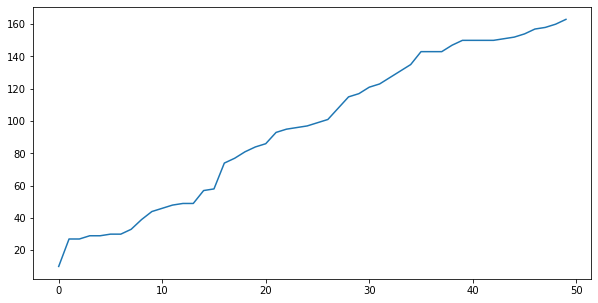

In [74]:
df_2["aircraft"].plot(figsize = (10, 5 ))
plt.show()

In [75]:
df_2.index

RangeIndex(start=0, stop=50, step=1)

In [76]:
df_3 = pd.read_csv("russia_losses_equipment.csv" , index_col="date" , parse_dates=True)
# Now we are telling pandas that we want to work with the Datetime Index

In [77]:
df_3.head()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
date,,,,,,,,,,,,,,
2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,NaN,NaN
2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,NaN,NaN
2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,NaN,NaN
2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,NaN,NaN
2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,NaN,NaN


In [78]:
df_3.index

DatetimeIndex(['2022-02-25', '2022-02-26', '2022-02-27', '2022-02-28',
               '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04',
               '2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08',
               '2022-03-09', '2022-03-10', '2022-03-11', '2022-03-12',
               '2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18', '2022-03-19', '2022-03-20',
               '2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24',
               '2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28',
               '2022-03-29', '2022-03-30', '2022-03-31', '2022-04-01',
               '2022-04-02', '2022-04-03', '2022-04-04', '2022-04-05',
               '2022-04-06', '2022-04-07', '2022-04-08', '2022-04-09',
               '2022-04-10', '2022-04-11', '2022-04-12', '2022-04-13',
               '2022-04-14', '2022-04-15'],
              dtype='datetime64[ns]', name='date', freq=None)

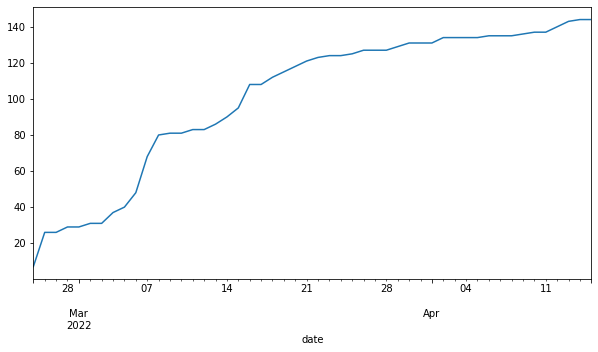

In [79]:
df_3["2022"]["helicopter"].plot(figsize = (10, 5 ))
plt.show()

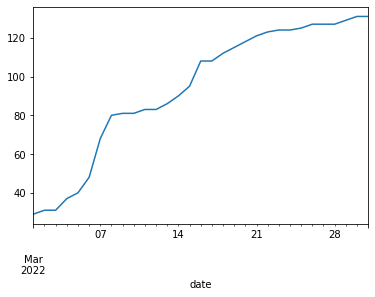

In [80]:
df_3["2022-03"]["helicopter"].plot()

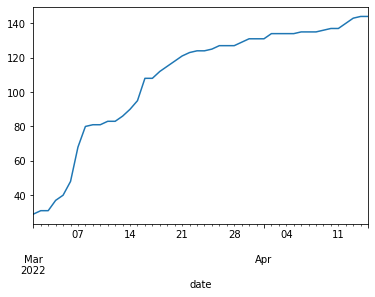

In [81]:
df_3["2022-03" : "2022-04"]["helicopter"].plot()